In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2facetesting/messi-ronaldo.jpeg
/kaggle/input/ai-hackathon-2024-faces/labels_for_more_training_data.csv
/kaggle/input/ai-hackathon-2024-faces/labels.csv
/kaggle/input/ai-hackathon-2024-faces/public_test/public_test/69408896.jpg
/kaggle/input/ai-hackathon-2024-faces/public_test/public_test/69934968.jpg
/kaggle/input/ai-hackathon-2024-faces/public_test/public_test/3410477.jpg
/kaggle/input/ai-hackathon-2024-faces/public_test/public_test/44989956.jpg
/kaggle/input/ai-hackathon-2024-faces/public_test/public_test/79053495.jpg
/kaggle/input/ai-hackathon-2024-faces/public_test/public_test/3787201.jpg
/kaggle/input/ai-hackathon-2024-faces/public_test/public_test/75097527.jpg
/kaggle/input/ai-hackathon-2024-faces/public_test/public_test/31391762.jpg
/kaggle/input/ai-hackathon-2024-faces/public_test/public_test/image_1769.jpg
/kaggle/input/ai-hackathon-2024-faces/public_test/public_test/56212495.jpg
/kaggle/input/ai-hackathon-2024-faces/public_test/public_test/3391976.jpg
/kaggle/i

In [2]:
#data_link = "/kaggle/input/ai-hackathon-2024-faces/data/mnt/md0/projects/sami-hackathon/private/data"
data_link = "/kaggle/input/ai-hackathon-2024-faces/private_test/data"
#labels_link = "/kaggle/input/ai-hackathon-2024-faces/labels.csv"
labels_link = "/kaggle/input/ai-hackathon-2024-faces/labels_for_more_training_data.csv"
public_test = "/kaggle/input/ai-hackathon-2024-faces/public_test/public_test"

In [4]:
labels = pd.read_csv(labels_link)

In [5]:
labels_past_data = pd.read_csv("/kaggle/input/ai-hackathon-2024-faces/labels.csv")

In [6]:
labels_past_data

file_name  height  width  \
0       100013282.jpg    1333   2000   
1       100016175.jpg    1333   2000   
2        10004189.jpg    2000   1333   
3       100104575.jpg    1333   2000   
4       100104600.jpg    2000   1333   
...               ...     ...    ...   
15305  image_2713.jpg    1024   1024   
15306  image_3332.jpg    1024   1024   
15307  image_6905.jpg    1024   1024   
15308  image_4080.jpg    1024   1024   
15309  image_8309.jpg    1024   1024   

                                                    bbox     age       race  \
0      [934.0000000000097, 144.82228672769534, 238.24...  20-30s  Caucasian   
1      [1094.0513571635438, 422.91772295627203, 55.45...  20-30s  Caucasian   
2      [419.93871061403877, 269.1250391680045, 377.19...  20-30s  Mongoloid   
3      [1490.6909678848915, 676.0000000000097, 37.553...  20-30s  Caucasian   
4      [549.169724453414, 92.52040334013152, 306.8821...  20-30s  Caucasian   
...                                                  ...     ...        ...   
15305  [244.71717171717162, 176.66666666666654, 587.2...  40-50s  Caucasian   
15306  [265.6338028169031, 174.2441314553992, 584.727...  Senior  Caucasian   
15307  [251.3434343434343, 184.7171717171712, 500.535...  20-30s  Caucasian   
15308  [222.72727272727235, 179.8181818181809, 586.90...     Kid  Caucasian   
15309  [169.37373737373707, 141.48484848484836, 566.2...    Baby  Caucasian   

         masked   skintone    emotion  gender  
0      unmasked  mid-light    Neutral    Male  
1      unmasked      light    Neutral    Male  
2      unmasked      light  Happiness  Female  
3      unmasked  mid-light    Neutral    Male  
4      unmasked  mid-light  Happiness  Female  
...         ...        ...        ...     ...  
15305  unmasked  mid-light  Happiness    Male  
15306  unmasked      light  Happiness  Female  
15307  unmasked      light    Neutral    Male  
15308  unmasked      light  Happiness  Female  
15309  unmasked      light    Neutral  Female  

[15310 rows x 10 columns]

In [5]:
labels

file_name  height  width  image_id  \
0        10003832.jpg    2000   1459         1   
1        10005259.jpg    1395   2000         2   
2        10005527.jpg    1507   2000         3   
3       100086002.jpg    1334   2000         4   
4       100148503.jpg    1561   2000         5   
...               ...     ...    ...       ...   
12733  image_9917.jpg    1024   1024     12649   
12734  image_9943.jpg    1024   1024     12650   
12735  image_9949.jpg    1024   1024     12651   
12736  image_9959.jpg    1024   1024     12652   
12737  image_9993.jpg    1024   1024     12653   

                                                    bbox   skintone     age  \
0      [584.1895944369563, 301.32785213219023, 265.74...  mid-light  20-30s   
1      [1131.1132364709713, 312.5498771883628, 285.10...      light  20-30s   
2      [548.0171526364226, 265.9999999999995, 246.980...  mid-light  20-30s   
3      [900.5677208085174, 57.13482704531668, 163.848...      light  20-30s   
4      [862.5207825161339, 478.9999999999999, 210.264...      light  20-30s   
...                                                  ...        ...     ...   
12733  [215.75757575757586, 179.5050505050501, 587.80...      light  40-50s   
12734  [168.87957497048382, 144.62573789846414, 597.8...      light  20-30s   
12735  [239.7999999999999, 185.70000000000005, 550.00...      light  20-30s   
12736  [198.99999999999665, 144.4887839433274, 584.22...      light  20-30s   
12737  [70.44878048780524, 175.30731707317034, 683.81...      light  40-50s   

            race    emotion  gender    masked  
0      Mongoloid      Anger    Male  unmasked  
1      Mongoloid    Neutral    Male  unmasked  
2      Mongoloid    Sadness  Female  unmasked  
3      Mongoloid    Neutral  Female  unmasked  
4      Caucasian  Happiness  Female  unmasked  
...          ...        ...     ...       ...  
12733  Caucasian  Happiness  Female  unmasked  
12734  Caucasian  Happiness  Female  unmasked  
12735  Mongoloid    Neutral  Female  unmasked  
12736  Caucasian  Happiness    Male  unmasked  
12737  Caucasian  Happiness  Female  unmasked  

[12738 rows x 11 columns]

In [7]:
labels.at[0, 'bbox']

'[934.0000000000097, 144.82228672769534, 238.24562254582438, 330.0662796338281]'

In [3]:
import cv2 as cv
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


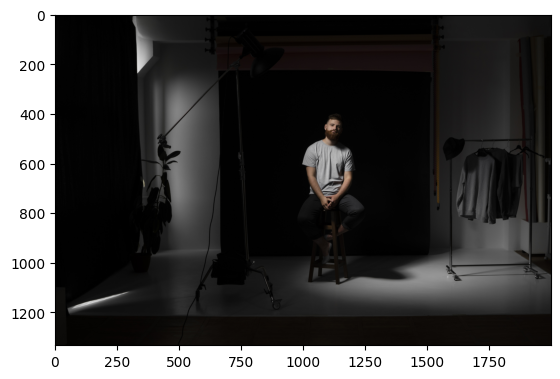

In [6]:
img = cv.imread("/kaggle/input/ai-hackathon-2024-faces/data/mnt/md0/projects/sami-hackathon/private/data/100016175.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img) # RGB 

In [20]:
img.shape

(1333, 2000, 3)

In [27]:
labels.at[1, 'bbox'][:1]

'['

1094.0513571635438 422.91772295627203 55.45378576262131 71.31039238064413
1094 423 55 71


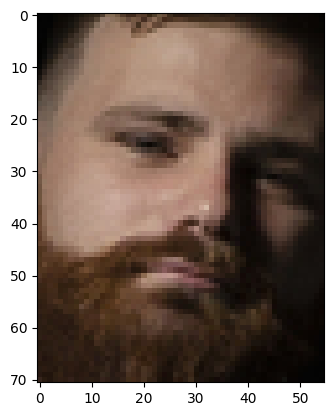

In [21]:
x, y, w, h = tuple([float(i) for i in labels.at[1, 'bbox'][1:-1].split(', ')])
print(x, y, w, h)
x, y, w, h = round(x), round(y), round(w), round(h)
print(x, y, w, h)
face = img[y:y+h, x:x+w]
plt.imshow(face)

In [6]:
bbox = dict()

for i in range(labels.shape[0]):
    filename = labels.at[i, 'file_name']
    bb = labels.at[i, 'bbox']
    skin = labels.at[i, 'skintone']
    x, y, w, h = tuple([float(i) for i in bb[1:-1].split(', ')])
    x, y, w, h = round(x), round(y), round(w), round(h)
    if filename not in bbox:
        bbox[filename] = ([], [])
    bbox[filename][0].append((x,y,w,h))
    bbox[filename][1].append(skin)

In [18]:
bbox['10003832.jpg']

([(584, 301, 266, 326)], ['mid-light'])

In [4]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 45.0 MB/s eta 0:00:0000:01


In [5]:
from mtcnn.mtcnn import MTCNN

In [9]:
class FACELOADING:
    def __init__(self, directory, is_train=True):
        self.directory = directory
        self.target_size = (224, 224)
        self.X = []
        self.y = []
        self.is_train = is_train
        self.detector = MTCNN() if not is_train else None
    
    
    def extract_data(self, filename, path):
        img = cv.imread(path)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        return [(cv.resize(img[bb[1]:bb[1]+bb[3], bb[0]:bb[0]+bb[2]], self.target_size), lb) for bb, lb in zip(bbox[filename][0], bbox[filename][1])]


    def load_data(self):
        for im_name in os.listdir(self.directory):
            try:
                path = self.directory + '/' + im_name
                data = self.extract_data(im_name, path)
                self.X.extend([dt[0] for dt in data])
                self.y.extend([dt[1] for dt in data])
            except Exception as e:
                pass
        return np.asarray(self.X), np.asarray(self.y)

In [10]:
faceloading = FACELOADING(data_link)
X, y = faceloading.load_data()

In [11]:
X.shape

(12738, 224, 224, 3)

In [20]:
y.shape

(12738,)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [23]:
labels['skintone'].unique()

array(['mid-light', 'light', 'dark', 'mid-dark'], dtype=object)

In [12]:
input_shape = (224, 224, 3)
classes = ['mid-light', 'light', 'mid-dark', 'dark']
EPOCHS = 50  # Increase the number of epochs
BS = 32

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
# Change values of targets to numerical values
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

In [17]:
X = tf.keras.applications.mobilenet_v2.preprocess_input(X)

In [20]:
type(X)

numpy.ndarray

In [19]:
import gc

In [20]:
X

array([[[[-0.73333335, -0.8745098 , -0.9137255 ],
         [-0.79607844, -0.9137255 , -0.9372549 ],
         [-0.75686276, -0.88235295, -0.90588236],
         ...,
         [-0.6784314 , -0.7254902 , -0.7019608 ],
         [-0.67058825, -0.70980394, -0.67058825],
         [-0.67058825, -0.7176471 , -0.6862745 ]],

        [[-0.7882353 , -0.9372549 , -0.9764706 ],
         [-0.7176471 , -0.8901961 , -0.9529412 ],
         [-0.60784316, -0.8039216 , -0.88235295],
         ...,
         [-0.6862745 , -0.75686276, -0.7490196 ],
         [-0.6784314 , -0.75686276, -0.7411765 ],
         [-0.5686275 , -0.64705884, -0.6392157 ]],

        [[-0.5529412 , -0.7647059 , -0.8509804 ],
         [-0.4352941 , -0.64705884, -0.7411765 ],
         [-0.4823529 , -0.7019608 , -0.79607844],
         ...,
         [-0.73333335, -0.8039216 , -0.81960785],
         [-0.7411765 , -0.827451  , -0.8352941 ],
         [-0.6784314 , -0.7411765 , -0.7490196 ]],

        ...,

        [[ 0.8117647 ,  0.5921569 ,  0

In [18]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [20]:
del X
gc.collect()

0

In [43]:
X

NameError: name 'X' is not defined

In [21]:
del y
gc.collect()

0

In [52]:
train_X.shape

(10190, 224, 224, 3)

In [22]:
# create data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [29]:
train_datagen = datagen.flow(train_X, train_y, batch_size=16, shuffle=True)

In [34]:
# MobileNet base model
base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
base_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [28]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(len(classes), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [32]:
test_y.shape

(2548,)

In [ ]:
# training
history = model.fit(
    train_datagen,
    steps_per_epoch=len(train_X) // BS,
    validation_data=(test_X, test_y),
    validation_steps=len(test_X) // BS,
    epochs=50,
    #callbacks=[lr_scheduler, early_stopping]  # Add both callbacks
)

Epoch 1/50
318/318 [==============================] - 62s 195ms/step - loss: 0.5449 - accuracy: 0.7522
Epoch 2/50
318/318 [==============================] - 62s 195ms/step - loss: 0.5334 - accuracy: 0.7595
Epoch 3/50
318/318 [==============================] - 62s 195ms/step - loss: 0.5451 - accuracy: 0.7518
Epoch 4/50
318/318 [==============================] - 62s 195ms/step - loss: 0.5337 - accuracy: 0.7565
Epoch 5/50
116/318 [=========>....................] - ETA: 38s - loss: 0.5363 - accuracy: 0.7554

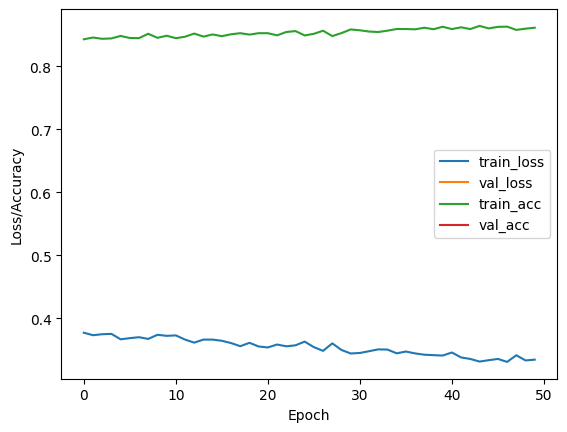

In [46]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.show()

In [30]:
history.history

{'loss': [0.7963611483573914,
  0.6549621820449829,
  0.614815890789032,
  0.5856354236602783,
  0.5629600286483765,
  0.5453655123710632,
  0.5326266288757324,
  0.5122348666191101,
  0.5050830841064453,
  0.48934680223464966,
  0.47393158078193665,
  0.46144500374794006,
  0.44955217838287354,
  0.43064382672309875,
  0.4152248501777649,
  0.4092685580253601,
  0.4041402339935303,
  0.38918671011924744,
  0.3713780641555786,
  0.3635215163230896,
  0.3570035398006439,
  0.34069520235061646,
  0.33090800046920776,
  0.31941133737564087,
  0.3113774359226227,
  0.3002229630947113,
  0.2903761863708496,
  0.2834525406360626,
  0.27373450994491577,
  0.2626402676105499,
  0.25538280606269836,
  0.24315117299556732,
  0.24053657054901123,
  0.2329060286283493,
  0.22276553511619568,
  0.21528856456279755,
  0.20969389379024506,
  0.20082074403762817,
  0.19453519582748413,
  0.18693247437477112,
  0.17925360798835754,
  0.1743301898241043,
  0.16617250442504883,
  0.16138270497322083,
  0

In [47]:
# evaluation 
preds = model.predict(test_X)
y_pred = np.argmax(preds, axis=1)

cm = confusion_matrix(test_y, y_pred)
print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(test_y, y_pred, target_names=classes))

96/96 [==============================] - 4s 41ms/step
Confusion Matrix:
[[  33    1   21   13]
 [   0 1853    8  236]
 [  16   21   62   60]
 [   3  353   42  340]]
Classification Report:
              precision    recall  f1-score   support

   mid-light       0.63      0.49      0.55        68
       light       0.83      0.88      0.86      2097
    mid-dark       0.47      0.39      0.42       159
        dark       0.52      0.46      0.49       738

    accuracy                           0.75      3062
   macro avg       0.61      0.55      0.58      3062
weighted avg       0.73      0.75      0.74      3062



In [62]:
del preds
gc.collect()

23767

In [63]:
del y_pred
gc.collect()

0

In [48]:
model.save('skin_classify_150epoch.keras')
print("saved")

saved


In [8]:
detector = MTCNN()

In [9]:
model = tf.keras.models.load_model('/kaggle/input/skin-model/skin_classify_150epoch.keras')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 2586948 (9.87 MB)
Trainable params: 328964

In [10]:
def prediction(filename):
    t_im = cv.cvtColor(cv.imread(filename), cv.COLOR_BGR2RGB)
    dtt = detector.detect_faces(t_im)
    if (len(dtt) == 0):
        return
    #faces = [tuple(dtt[i]['box']) for i in range(len(dtt))]     
    '''for i in range(len(dtt)):
        faces.append(dtt[i])
    faces = [(x,y,w,h) for x,y,w,h in dtt[i]['box'] for i in range(len(dtt))]'''
    x,y,w,h = tuple(dtt[0]['box'])
    t_im = cv.resize(t_im[round(y):round(y)+round(h), round(x):round(x)+round(w)], (224,224))
    t_im = np.asarray(t_im)
    t_im = tf.keras.applications.mobilenet_v2.preprocess_input(t_im)
    pred = model.predict(t_im.reshape((1,224,224,3)))
    ypred = np.argmax(pred, axis=1)
    return pred, ypred

In [11]:
prediction("/kaggle/input/2facetesting/messi-ronaldo.jpeg")

1/1 [==============================] - 1s 1s/step


(array([[2.4961549e-04, 5.3693968e-01, 1.1081294e-02, 4.5172939e-01]],
       dtype=float32),
 array([1]))

In [69]:
prediction("/kaggle/input/ai-hackathon-2024-faces/public_test/public_test/102845105.jpg")

1/1 [==============================] - 0s 21ms/step


(array([[4.0669548e-08, 2.9559648e-01, 3.1630616e-04, 7.0408714e-01]],
       dtype=float32),
 array([3]))

In [ ]:
def get_ytest(path):
    y = []
    for im_name in os.listdir(path):
        try:
            y.append(prediction(path + '/' + im_name)[1])
        except Exception as e:
            pass
            
    return np.asarray(y)

y_public_test = get_ytest("/kaggle/input/ai-hackathon-2024-faces/public_test/public_test")
print(y_public_test)

1/1 [==============================] - ETA: 0s

In [14]:
y_public_test.shape

(2127, 1)

In [15]:
np.savetxt('skin_ans', y_public_test)

In [ ]:
def get_Xtest(path):
    X = []
    for im_name in os.listdir(path):
        try:
            filename = path + '/' + im_name
            t_im = cv.imread(filename)
            t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)
            x,y,w,h = detector.detect_faces(t_im)[0]['box']
            X.append(cv.resize(t_im[y:y+h, x:x+w], (224,224)))
        except Exception as e:
            pass
    return np.asarray(X)

X_public_test = get_Xtest("/kaggle/input/ai-hackathon-2024-faces/public_test/public_test")
X_public_test = tf.keras.applications.mobilenet_v2.preprocess_input(X_public_test)

1/1 [==============================] - ETA: 0s

In [ ]:
def get_ytest(path):
    X = []
    for im_name in os.listdir(path):
        try:
            filename = path + '/' + im_name
            t_im = cv.imread(filename)
            t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)
            x,y,w,h = detector.detect_faces(t_im)[0]['box']
            X.append(cv.resize(t_im[y:y+h, x:x+w], (224,224)))
        except Exception as e:
            pass
    return np.asarray(X)

X_public_test = get_Xtest("/kaggle/input/ai-hackathon-2024-faces/public_test/public_test")
X_public_test = tf.keras.applications.mobilenet_v2.preprocess_input(X_public_test)

In [ ]:
# testing
private_test = "/kaggle/input/ai-hackathon-2024-faces/private_test_data/private_test_data"
results = []

for im_name in os.listdir(private_test):
    filename = private_test + '/' + im_name
    
    origin_im = cv.imread(filename)
    origin_im = cv.cvtColor(origin_im, cv.COLOR_BGR2RGB)
    
    for face in detector.detect_faces(origin_im):
        x,y,w,h = face["box"]
        t_im = np.asarray(cv.resize(origin_im[y:y+h, x:x+w], (224,224)))
        t_im = tf.keras.applications.mobilenet_v2.preprocess_input(t_im)
        pred = model.predict(t_im.reshape(1, 224, 224, 3))
        ypred = np.argmax(pred, axis=1)
        results.append((im_name, classes[ypred[0]]))
        
result_df = pd.DataFrame(results, columns=("file_name", "skintone"))
result_df.to_csv("/kaggle/working/skinans.csv", index=False)

1/8 [==>...........................] - ETA: 0s

In [15]:
X_public_test.shape

(2127, 224, 224, 3)

In [16]:
y_public_preds = model.predict(X_public_test)
y_public_pred = np.argmax(y_public_preds, axis=1)

67/67 [==============================] - 5s 47ms/step


In [18]:
y_public_pred.shape

(2127,)

In [19]:
np.savetxt('out.txt', y_public_pred)

y_public_preds = model.predict(test_X)
y_pred = np.argmax(preds, axis=1)
​
cm = confusion_matrix(test_y, y_pred)
print("Confusion Matrix:")
print(cm)
​
print("Classification Report:")
